In [1]:
#----------------------------------------------------------------------------------------
#Imports
#========================================================================================

#Import entire cmath library
#from cmath import *

#Import entire pandas library as pd
#import pandas as pd

#This is used for variable display in the GUI
#import sys

#Import entire numpy library
from numpy import *

#Import scipy.special library
from scipy.special import *

#Import entire matplotlib.pyplot library as plt
from matplotlib.pyplot import *

In [2]:
#----------------------------------------------------------------------------------------
# Inputs
#========================================================================================
#nu1: Longitudinal wave speed
v1 = 1100 #m/s

#Xi1: Longitudinal wave attenuation
X1 =  2.4 #dB/MHz/m

#nu2: Shear wave speed
v2 = 570 #m/s

#Xi2: Shear wave attenuation
X2 = X1*v1/v2 #dB/Mhz/m

#rho: Desity of the Medium
p = 1030 #kg/m^3

#rho2: Density of the crystal
p2 = 1910 #kg/m^3

#Phi': Amplitude of the Incident Wave
P1 = 0.000001 #m

#a: radius of the chrystal
a = 0.00025 #m

#f: frequency
f = 500000 #Hz

#k: Thermal Conductivity
k1 = 0.27 #W/(m-K)

#gamma: Thermal Diffusivity
gamma = 1.02*10**-7 #m^2/s

#U0: Thermal Diffusivity
h = 5 #W/(m^2-K)

In [3]:
#----------------------------------------------------------------------------------------
# Parameter Equations
#========================================================================================

#Cotangent function
def cot(tha):
    if tha == 0 or tha == pi:
        return 0
    else:
        return 1/tan(tha)

#Ratio of densities
eta = p/p2

#Tangents
tan1 = X1*v1*100/(pi*8.686*10**6)
tan2 = X2*v2*100/(pi*8.686*10**6)

#mus
u_e = v2**2*p
u_v = u_e*tan2
u1 = u_e + u_v* 1j

#omega: angular frequency
w = 2*pi*f

#lambdas
x_e = v1**2*p-2*u_e
x_v = x_e * tan1
x = x_e + x_v * 1j

#
E1 = (u1*(3*x + 2*u1))/(x + u1)

#
nu1 = x/(2*(x + u1))

#alpha_1 = Complex Longitudinal Wave Number
a1 = sqrt(w**2*p/(x + 2 * u1))

#Betta_1: Complex Shear Wave Number
B1 = sqrt(p*w**2/u1)

#Phi0: Wave Potential Amplitude
P = P1*exp(1j*a1*a*20)/a1

In [16]:
#----------------------------------------------------------------------------------------
#Imported scipy funcations
#========================================================================================

#P_n: Legendre Polynomials
def Pn(n):
    return legendre(n)
#n: int
#Degree of the polynomial.


def Pndev1(n,x):
    return -(n+1)*(x*Pn(n)(x)-Pn(n+1)(x))/(x**2 - 1)


#d(P_n)/dtheta: derivatives of Legendre Polynomials
def dPndtha(m,n,x,tha):
    if n == 0:
        return 0
        
    elif n == 1:
        if m == 1:
            return cot(tha)*Pndev1(n,x)
        elif m == 2:
            return -lpmv(1,n,x)*(cot(tha))
        else:
            raise TypeError("Invlaid input. The first term should be a 1 or a 2")
        
    elif n > 1:
        if m == 1:
            return cot(tha)*Pndev1(n,x)
        elif m == 2:
            return lpmv(2,n,x) - lpmv(1,n,x)*(cot(tha))
        else:
            raise TypeError("Invlaid input. The first term should be a 1 or a 2")

#h_n: Spherical Hankel Function of the first kind
def hn(n,z):
    return sqrt( pi/(2*z) ) * hankel1(n+0.5,z)
#n: array_like
#Order (float)

#z: array_like
#Argument (float or complex)
#Basically whatever is in the parentheses


#j_n: Spherical Bessel Function of the first kind
def jn(n,z):
    return spherical_jn(n,z)
#n: int, array_like
#Order of the Bessel function (n >= 0)

#z: complex or float, array_like
#Argument of the Bessel function
#Basically whatever is in the parentheses

In [5]:
#----------------------------------------------------------------------------------------
#Coefficient for the Longitudinal and Shear Wave Potentials respectivly
#========================================================================================

#A_n
def An(n):
    if n == 1:
        e11 = (1-eta)*hn(1,a1*a) - a1*a*hn(2,a1*a)
        e21 = (1-eta)*hn(1,a1*a)
        e12 = -2*(1-eta)*hn(1,B1*a)
        e22 = -2*(1-eta)*hn(1,B1*a) + B1*a*hn(2,B1*a)
        e1  = -3*1j*((1-eta)*jn(1,a1*a) - a1*a*jn(2,a1*a))
        e2  = -3*1j*(1-eta)*jn(1,a1*a)
        
        mat = array([[e11,e12],[e21,e22]])
        av = P*array([[e1],[e2]])
        x = linalg.solve(mat,av)
    
        An = x[0][0]
        Bn = x[1][0]
    
    else:
        E11 = n*hn(n,a1*a) - a1*a*hn(n+1,a1*a)
        E12 = -n*(n+1)*hn(n,B1*a)
        E21 = hn(n,a1*a)
        E22 = -(n+1)*hn(n,B1*a) + B1*a*hn(n+1,B1*a)
        E1  = -1j**n*(2*n+1)*(n*jn(n,a1*a) - a1*a*jn(n+1,a1*a))
        E2  = -1j**n*(2*n+1)*jn(n,a1*a)
    
        mat = array([[E11,E12],[E21,E22]])
        av = P*array([[E1],[E2]])
        x = linalg.solve(mat,av)
    
        An = x[0][0]
        Bn = x[1][0]
    return An

#B_n
def Bn(n):
    if n == 1:
        e11 = (1-eta)*hn(1,a1*a) - a1*a*hn(2,a1*a)
        e21 = (1-eta)*hn(1,a1*a)
        e12 = -2*(1-eta)*hn(1,B1*a)
        e22 = -2*(1-eta)*hn(1,B1*a) + B1*a*hn(2,B1*a)
        e1  = -3*1j*((1-eta)*jn(1,a1*a) - a1*a*jn(2,a1*a))
        e2  = -3*1j*(1-eta)*jn(1,a1*a)
    
        mat = array([[e11,e12],[e21,e22]])
        av = P*array([[e1],[e2]])
        x = linalg.solve(mat,av)
    
        An = x[0][0]
        Bn = x[1][0]
    
    else:
        E11 = n*hn(n,a1*a) - a1*a*hn(n+1,a1*a)
        E12 = -n*(n+1)*hn(n,B1*a)
        E21 = hn(n,a1*a)
        E22 = -(n+1)*hn(n,B1*a) + B1*a*hn(n+1,B1*a)
        E1  = -1j**n*(2*n+1)*(n*jn(n,a1*a) - a1*a*jn(n+1,a1*a))
        E2  = -1j**n*(2*n+1)*jn(n,a1*a)
    
        mat = array([[E11,E12],[E21,E22]])
        av = P*array([[E1],[E2]])
        x = linalg.solve(mat,av)
    
        An = x[0][0]
        Bn = x[1][0]
    return Bn

In [6]:
#----------------------------------------------------------------------------------------
#Spacial Arrays
#========================================================================================

#Number of Points
N = 20

#R array
r = linspace(a, 20*a, N)
#i

#Theta array
tha = linspace(pi/N, 2*pi-pi/N, N)
#j

#Filling in gap
dtha = tha[1]-tha[0]
tha1 = ndarray.tolist(tha)
tha1.append(tha1[-1]+dtha)
tha1 = array(tha1)

In [7]:
#----------------------------------------------------------------------------------------
# This is the stress equation for R R
#========================================================================================
def sigrr_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 85):
        sigsum += ( 
            Pn(n)(cos(tha)) * 
            ( 
                P * (1j)**n * (2*n + 1) * 
                ( 
                    (n**2 - n - B1**2 * r**2/2) * ( jn(n,(a1*r)) ) + 2*a1*r*jn(n+1,(a1*r)) 
                ) + 
                An(n) * 
                ( 
                    (n**2 - n - B1**2 * r**2/2) * ( hn(n,(a1*r)) ) + 2*a1*r*hn(n+1,(a1*r)) 
                ) - 
                Bn(n) * 
                ( 
                    n*(n+1)*(n-1)*hn(n,(B1*r)) - n*(n+1)*B1*r*hn(n+1,(B1*r)) 
                ) 
            )
        )
    return sigsum

#sigma_rr
sigrr = zeros( (r.size,tha.size),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigrr[i,j] = 2*u1/r[i]**2 * sigrr_sum(r[i],tha[j])
        
#Filling in gap
sigrr = ndarray.tolist(transpose(sigrr))
sigrr.append(sigrr[0])
sigrr = array(sigrr)

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------
# This is the graph for Stress R R
#============================================================================================================================

#Creating Graph
R, theta = meshgrid(r, tha1)

X = R * cos(theta)
Y = R * sin(theta)
values = abs(sigrr)

fig, ax = subplots(subplot_kw=dict())
ax.contourf(X, Y, values)

jet()
colorbar(gca().get_children()[2], ax=gca())
gca().set_aspect("equal")
show()

In [17]:
#----------------------------------------------------------------------------------------
# This is the stress equation for Phi Phi
#========================================================================================
def sigphiphi_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 85):
        sigsum += (
            ( 
                Pn(n)(cos(tha)) * 
                ( 
                    P * (1j)**n * ( 2*n + 1 ) * 
                    ( 
                        (n + (a1**2) * (r**2) - (B1**2 * r**2/2)) * (jn(n,(a1*r))) - a1*r*jn(n+1,(a1*r)) 
                    ) +  
                    An(n) * 
                    ( 
                        (n + (a1**2) * (r**2) - (B1**2) * (r**2)/2) * hn(n,(a1*r)) - a1*r*hn(n+1,(a1*r))
                    ) - 
                    Bn(n) * n * (n + 1) * hn(n,(B1*r))
                ) + 
                cot(tha)*dPndtha(1,n,cos(tha),tha) * 
                (
                    P * (1j)**n * (2*n + 1) * jn(n,(a1*r)) + 
                    An(n) * hn(n,(a1*r)) - 
                    Bn(n) *
                    (
                        (n+1)*hn(n,(B1*r)) - B1*r*hn(n+1,(B1*r))
                    )
                )
            )
        )
    return sigsum

#sigma_phiphi
sigphiphi = zeros( (r.size,tha.size),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigphiphi[i,j] = 2*u1/r[i]**2 * sigphiphi_sum(r[i],tha[j])
        

#Filling in gap
sigphiphi = ndarray.tolist(transpose(sigphiphi))
sigphiphi.append(sigphiphi[0])
sigphiphi = array(sigphiphi)

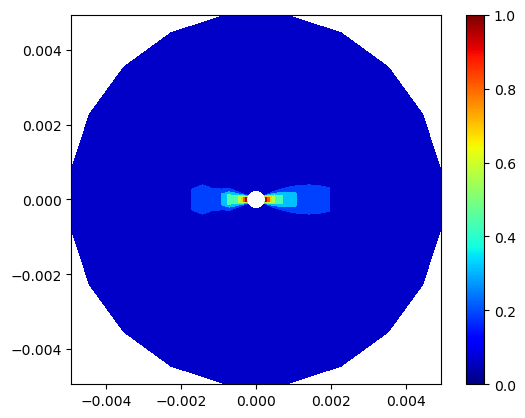

In [18]:
#----------------------------------------------------------------------------------------------------------------------------
# This is the graph for Stress Phi Phi
#============================================================================================================================

#Creating Graph
R, theta = meshgrid(r, tha1)

X = R * cos(theta)
Y = R * sin(theta)
values = abs(sigphiphi)

fig, ax = subplots(subplot_kw=dict())
ax.contourf(X, Y, values)

jet()
colorbar(gca().get_children()[2], ax=gca())
gca().set_aspect("equal")
show()

In [11]:
#----------------------------------------------------------------------------------------
# This is the stress equation for Theta Theta
#========================================================================================
def sigthatha_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 85):
        sigsum += (
            (
                Pn(n)(cos(tha)) * 
                (
                    P * (1j)**n * ( 2*n + 1 ) * 
                    ( 
                        (n + (a1**2) * (r**2) - (B1**2 * r**2)/2) * jn(n,(a1*r)) - a1*r*jn(n+1,(a1*r)) 
                    ) + 
                    An(n) * 
                    (
                        (n + (a1**2) * (r**2) - (B1**2 * r**2)/2) * hn(n,(a1*r)) - a1*r*hn(n+1,(a1*r))
                    ) - 
                    Bn(n)* n * (n + 1) * hn(n,(B1*r))
                ) +
                dPndtha(2,n,cos(tha),tha) * 
                (
                    P * (1j)**n * (2*n + 1) * jn(n,(a1 * r)) + An(n) * hn(n,(a1*r)) - 
                    Bn(n) * 
                    (
                        (n+1) * hn(n,(B1*r)) - B1*r*hn(n+1,(B1*r))
                    )
                )
            )
        )
    return sigsum

#sigma_thetatheta
sigthatha = zeros( (r.size,tha.size),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigthatha[i,j] = 2*u1/r[i]**2 * sigthatha_sum(r[i],tha[j])
        
#Filling in gap
sigthatha = ndarray.tolist(transpose(sigthatha))
sigthatha.append(sigthatha[0])
sigthatha = array(sigthatha)

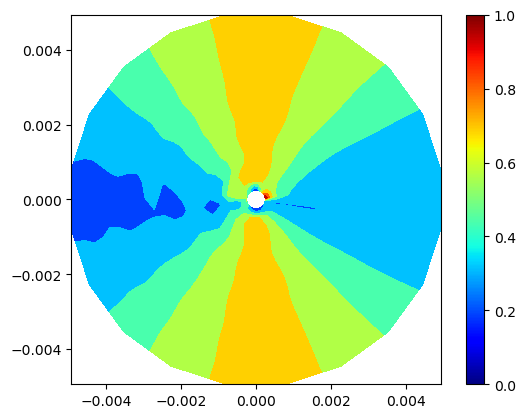

In [12]:
#----------------------------------------------------------------------------------------
# This is the graph for Stress Theta Theta
#========================================================================================

#Creating Graph
R, theta = meshgrid(r, tha1)

X = R * cos(theta)
Y = R * sin(theta)
values = abs(sigthatha)

fig, ax = subplots(subplot_kw=dict())
ax.contourf(X, Y, values)

jet()
colorbar(gca().get_children()[2], ax=gca())
gca().set_aspect("equal")
show()

In [13]:
#----------------------------------------------------------------------------------------
# This is the stress equation for R Theta
#========================================================================================
def sigrtha_sum(r,tha):
    sigsum = 0
    
    for n in range(0, 85):
        sigsum += ( 
            dPndtha(1,n,cos(tha),tha) * 
            (
                P * (1j)**n * (2*n + 1) * 
                ( 
                    (n-1) * jn(n,(a1*r)) - a1*r * jn(n+1,(a1*r)) 
                ) + 
                An(n) * 
                 ( 
                     (n - 1) * hn(n,(a1*r)) - a1*r * hn(n+1,(a1*r))
                 ) -
                Bn(n) * 
                     ( 
                         (n**2 - 1 - (B1**2 * r**2)/2) * hn(n,(B1*r)) + (B1*r) * hn(n+1,(B1*r)) 
                     )
                )
            )
    return sigsum

#sigma_rtheta
sigrtha = zeros( (r.size,tha.size),dtype = complex )

for i in range(0, r.size):
    for j in range(0, tha.size):
        sigrtha[i,j] = 2*u1/r[i]**2 * sigrtha_sum(r[i],tha[j])
        
#Filling in gap
sigrtha = ndarray.tolist(transpose(sigrtha))
sigrtha.append(sigrtha[0])
sigrtha = array(sigrtha)

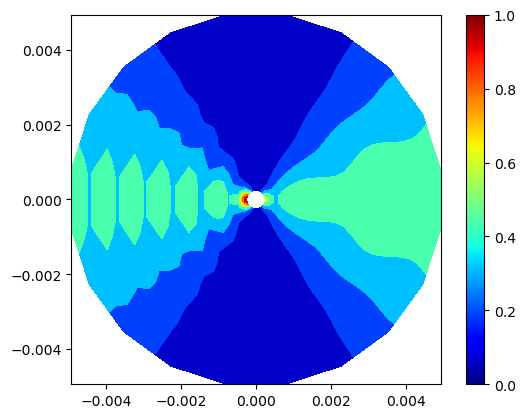

In [14]:
#----------------------------------------------------------------------------------------
# This is the graph for Stress R Theta
#========================================================================================

#Creating Graph
R, theta = meshgrid(r, tha1)

X = R * cos(theta)
Y = R * sin(theta)
values = abs(sigrtha)

fig, ax = subplots(subplot_kw=dict())
ax.contourf(X, Y, values)

jet()
colorbar(gca().get_children()[2], ax=gca())
gca().set_aspect("equal")
show()

TypeError: Shape of x does not match that of z: found (20, 20) instead of (20, 21).

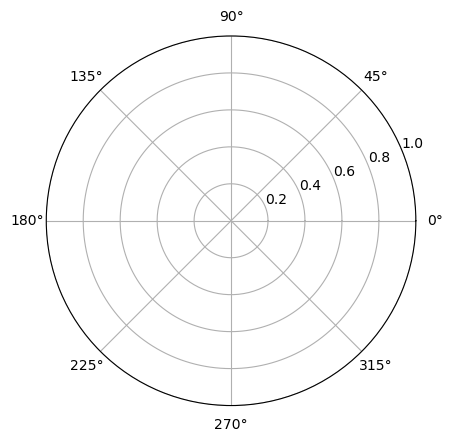

In [15]:
#----------------------------------------------------------------------------------------
# This is the graph for Stress R R
#========================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = transpose(abs(sigrr))


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

show()

In [ ]:
#----------------------------------------------------------------------------------------
# This is the graph for Stress Phi Phi
#========================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = transpose(abs(sigphiphi))


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

show()

In [ ]:
#----------------------------------------------------------------------------------------
# This is the graph for Stress Theta Theta
#========================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = transpose(abs(sigthatha))


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, values)

show()

In [ ]:
#----------------------------------------------------------------------------------------
# This is the graph for Stress R Theta
#========================================================================================
#-- Generate Data -----------------------------------------
# Using linspace so that the endpoint of 360 is included...
azimuths = tha
zeniths = r

R, theta = meshgrid(zeniths, azimuths)
values = abs(sigrtha)


#-- Plot... ------------------------------------------------
fig, ax = subplots(subplot_kw=dict(projection='polar'))
ax.contourf(theta, R, transpose(values))

show()